In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
day3_instructions = [] 
day3_inputs = "inputs/day3.txt"
with open(day3_inputs) as file:
    day3_instructions = file.readlines()

In [5]:
# part 1
d3i_split = list(day3_instructions[0])
instructions_dict = {
    ">": 1,
    "<": -1,
    "^": 2,
    "v": -2
}

curr_x, curr_y = (0,0)
curr_coord = np.array([curr_x, curr_y])

visited_coords = []

for i in range(len(d3i_split)):
    curr_instruction = d3i_split[i] 
    ci_dict = instructions_dict[curr_instruction]
    ci_int = int(ci_dict)
    
    ci_axis = np.abs(ci_int) - 1 # taking the absolute value will tell what axis the instruction is
    
    if ci_int < 0:
        ci = -1
    else:
        ci = 1
    
    curr_coord[ci_axis] = curr_coord[ci_axis] + ci
    visited_coords.append([curr_coord[0], curr_coord[1]])
    
#     print(curr_instruction, ci_dict, ci_int, ci_axis)

print(curr_coord) # the final coordinate
visited_coords_array = np.asarray(visited_coords)

# find min and max coords then make a grid 
coord_minx = np.min(visited_coords_array[:,0])
coord_maxx = np.max(visited_coords_array[:,0])

coord_miny = np.min(visited_coords_array[:,1])
coord_maxy = np.max(visited_coords_array[:,1])

print(coord_minx, coord_miny, coord_maxx, coord_maxy)
total_lengthx = np.abs(coord_minx) + np.abs(coord_maxx)
total_lengthy = np.abs(coord_miny) + np.abs(coord_maxy)

grid_array = np.zeros([total_lengthx+1, total_lengthy+1])

# go through the coordinate steps
# i need to shift the grid so that it makes sense 
# originally 0,0 is the center, index wise: 0,0 is the top left of the array which will be minx, maxy
# therefore shift by -abs(minx), and + abs(maxy)
for i in range(len(visited_coords_array)):
    vc_curr = visited_coords_array[i]
    
    vc_curr_x = vc_curr[0]
    vc_curr_y = vc_curr[1]
    
    if vc_curr_x >= 0:
        grid_index_x = vc_curr_x + np.abs(coord_minx)
    if vc_curr_x <= 0:
        grid_index_x = np.abs(np.abs(vc_curr_x) + coord_minx)
    if vc_curr_y >= 0:
        grid_index_y = coord_maxy - vc_curr_y
    if vc_curr_y <= 0:
        grid_index_y = coord_maxy + np.abs(coord_miny + np.abs(vc_curr_y))
    
    grid_array[grid_index_x][grid_index_y] = grid_array[grid_index_x][grid_index_y] + 1
    
# vca_unique = np.unique(grid_array, return_index=True)
ga_flat = grid_array.flatten()
at_least_one_present = ga_flat[ga_flat>0]
alop_len = len(at_least_one_present)
print("at least one present", alop_len)

[ 41 -95]
-26 -127 55 17
at least one present 2591


In [6]:
# using meshgrid
x = np.arange(coord_minx, coord_maxx)
y = np.arange(coord_miny, coord_maxy)
xv, yv = np.meshgrid(x, y)

z = np.zeros_like(xv)
print(z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


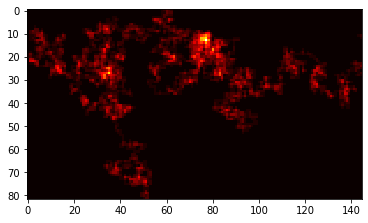

In [7]:
plt.imshow(grid_array, cmap='hot', interpolation='nearest')
plt.show()

In [8]:
# someone's solution from reddit
from itertools import product

X = Y = 0
visited = [(0,0)] #(0,0) always visited
unique_houses_visited = 1 #house at (0,0)

with open('inputs/day3.txt') as f:
    for c in f.read():
        if c == '^':
            Y += 1
        elif c == '<':
            X -= 1
        elif c == 'v':
            Y -= 1
        elif c == '>':
            X += 1

        # Check if new house
        if (X, Y) not in visited:
            # New house
            unique_houses_visited += 1
            visited.append((X, Y))

#answer      
print("Unique houses visited:", unique_houses_visited)

Unique houses visited: 2592


In [9]:
# starting again
print(visited_coords_array)
# want to find the number of houses who have received at least one present, 
# so the number of houses actually visited once
# the visited_coords_array contains duplicates, so want to find whether there
# are duplicates

vca_stack = np.vstack({tuple(e) for e in visited_coords_array})
print(len(vca_stack)) 

# THERE'S ONE PRESENT AT THE STARTING LOCATION!!!! therefore add 1 

[[  1   0]
 [  1   1]
 [  1   2]
 ...
 [ 42 -94]
 [ 42 -95]
 [ 41 -95]]
2591


<ipython-input-9-9dfbd7506ca1>:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vca_stack = np.vstack({tuple(e) for e in visited_coords_array})


In [27]:
# part 2 - santa and robosanta
# again one house at the start - they take turns on which instructions to take, 
# santa first, then robosanta second

santa_directions = []
robosanta_directions = []

curr_coord_santa = np.array([0, 0])
curr_coord_robosanta = np.array([0, 0])

unique_houses = []

for i in range(len(d3i_split)):
    curr_instruction = d3i_split[i] 
    ci_dict = instructions_dict[curr_instruction]
    ci_int = int(ci_dict)
    
    ci_axis = np.abs(ci_int) - 1 # taking the absolute value will tell what axis the instruction is
    
    if ci_int < 0:
        ci = -1
    else:
        ci = 1
    
    if i % 2 == 0:
        curr_coord_santa[ci_axis] = curr_coord_santa[ci_axis] + ci
        if (curr_coord_santa[0], curr_coord_santa[1]) not in unique_houses:
            unique_houses.append((curr_coord_santa[0], curr_coord_santa[1]))
    else:
        curr_coord_robosanta[ci_axis] = curr_coord_robosanta[ci_axis] + ci
        if (curr_coord_robosanta[0], curr_coord_robosanta[1]) not in unique_houses:
            unique_houses.append((curr_coord_robosanta[0], curr_coord_robosanta[1]))

In [28]:
print(len(unique_houses)) # THIS IS THE RIGHT ANSWER! woo

2360
